In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import os
import pickle
import sys
from pathlib import Path

import lab.torch as B
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from wbml import plot
import tueplots

# torch.set_printoptions(precision=8, sci_mode=False, edgeitems=5)
torch.set_printoptions(profile='full') # 'short'

colors = sns.color_palette("bright")
sns.set_style("whitegrid")
sns.set_palette(colors)

matplotlib.rcParams["figure.dpi"] = 150  # for high quality, retina plots

from tueplots import bundles, fontsizes, figsizes


from wbml import plot

### Locations

Read log files

In [10]:
folder = "results/07-27-20.32.17_seq-pvi-2c-2g-1000l-standardprior-80n-40b-0-02lr-2s-40m"

In [11]:
main_dir = os.path.dirname(os.path.abspath(os.getcwd()))
preds_dir = os.path.join(main_dir, folder, "model")
file_name = 'eval_domain_preds.csv'
preds_file = os.path.join(preds_dir, file_name)

train_data = pd.read_csv(os.path.join(preds_dir, "training_data.csv"))
preds = pd.read_csv(preds_file)

In [13]:
if folder.split('/')[1].split('_')[1].split('-')[1] == 'pvi':
    q_type = 'GI'
else:
    q_type = 'MFVI'

data = preds
quartiles = np.quantile(preds.loc[:, preds.columns.str.startswith('preds_')], np.array((0.02275, 0.15865, 0.84135, 0.97725)), axis=1)
x_sorted, q0, q1, q2, q3 = zip(*sorted(zip(data['x_eval'], quartiles[0, :], quartiles[1, :], quartiles[2, :], quartiles[3, :])))

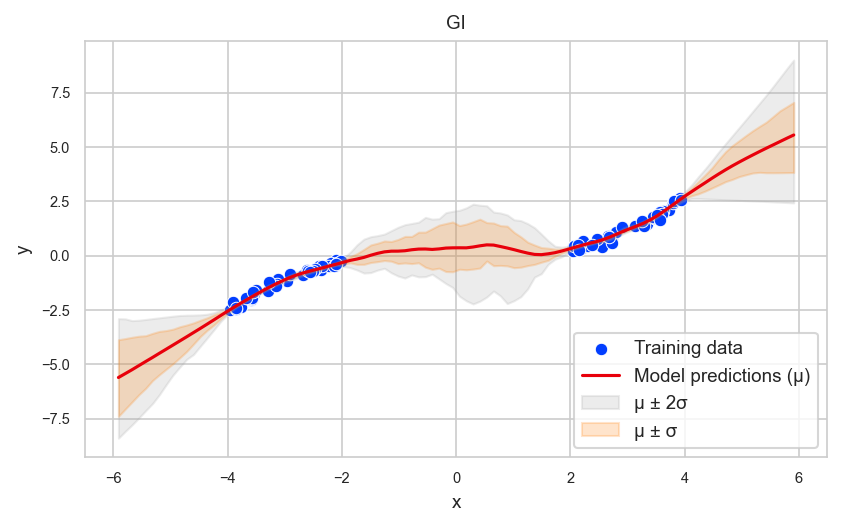

In [14]:
colors = sns.color_palette("bright")
sns.set_style("whitegrid")
sns.set_palette(colors)
with plt.rc_context({**figsizes.neurips2022(ncols=1), **fontsizes.neurips2022()}):
    fig, ax = plt.subplots(1, 1)
    
    x_metric = 'x_eval'
    y_metric = 'y_pred_mean'
    
    sns.scatterplot(data=train_data, x='x_tr', y='y_tr', ax=ax, label="Training data")
    sns.lineplot(data=data, x=x_metric, y=y_metric, ax=ax, label="Model predictions (μ)", color=colors[3])
    
    x_sorted, q0, q1, q2, q3 = zip(*sorted(zip(data[x_metric], quartiles[0, :], quartiles[1, :], quartiles[2, :], quartiles[3, :])))
    ax.fill_between(x_sorted, q0, q3, color=colors[7], alpha=0.20, label="μ ± 2σ")
    ax.fill_between(x_sorted, q1, q2, color=colors[1], alpha=0.20, label="μ ± σ")
    
    ax.set_title(f'{q_type}')    
    ax.set_ylabel(' '.join(y_metric.split('_')[0]))
    ax.set_xlabel(' '.join(x_metric.split('_')[0]))
    ax.legend(loc="lower right", prop={"size": 9})

    # file_name = f"./{img_folder}/{split}_{dataset}_server_{x_metric}_{y_metric}"
    # file_name += append_file_name
    # if save_plot: plt.savefig(file_name)
    plt.show()

    

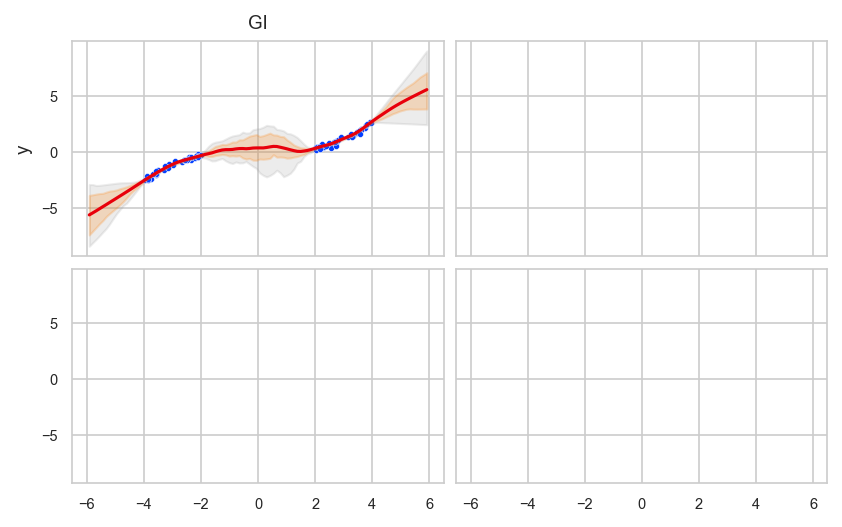

In [17]:
colors = sns.color_palette("bright")
sns.set_style("whitegrid")
sns.set_palette(colors)
with plt.rc_context({**figsizes.neurips2022(ncols=1), **fontsizes.neurips2022()}):
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
    
    x_metric = 'x_eval'
    y_metric = 'y_pred_mean'
    
    ax = axes[0, 0]
    sns.scatterplot(data=train_data, x='x_tr', y='y_tr', ax=ax, s=8)
    sns.lineplot(data=data, x=x_metric, y=y_metric, ax=ax, color=colors[3])
    
    x_sorted, q0, q1, q2, q3 = zip(*sorted(zip(data[x_metric], quartiles[0, :], quartiles[1, :], quartiles[2, :], quartiles[3, :])))
    ax.fill_between(x_sorted, q0, q3, color=colors[7], alpha=0.20, label="μ ± 2σ")
    ax.fill_between(x_sorted, q1, q2, color=colors[1], alpha=0.20, label="μ ± σ")
    
    # fig.suptitle("Toy Regression")
    ax.set_title(f'{q_type}')    
    ax.set_ylabel(' '.join(y_metric.split('_')[0]))
    ax.set_xlabel(' '.join(x_metric.split('_')[0]))
    # ax.legend(loc="lower right", prop={"size": 3})

    # file_name = f"./{img_folder}/{split}_{dataset}_server_{x_metric}_{y_metric}"
    # file_name += append_file_name
    # if save_plot: plt.savefig(file_name)
    plt.show()

    